# Beer's Law and Principles of Quantitative Analysis
## Learning Objectives
- Describe the differences between qualitative and quantitative analysis.
- Based on results for standards that each contain an analyte at a known concentration, construct a calibration curve and determine a response function.
- Based on a response function and results for a sample containing an analyte at an unknown concentration, determine the concentration of the analyte.
- Define the accuracy and precision of a chemical measurement. Give examples of how determinate and indeterminate errors affect results from chemical measurements.

## Fundamentals of Analytical Chemistry
Analytical chemistry is focused on characterizing the composition of matter:
- *Analyte*: the molecule or species in a sample that is being analyzed.
- *Qualitative analysis*: is the analyte present in the sample?
- *Quantitative analysis*: how much of the analyte is present in the sample?
  
Analytical chemistry research is usually focused on improving, extending, and/or characterizing methods for chemical analysis. For example:
- Developing a new measurement technique.
- Applying a measurement technique to a new analyte.
- Applying a measurement technique to a new type of sample (e.g., fish from a lake versus lake water) or in a new setting (e.g., field-based versus laboratory-based measurements).
- Developing and validating a protocol for use in routine chemical analysis (rather than performing routine chemical analysis using an established protocol).


## Response Function
A response function relates the $signal$ (the observable of a measurement) to the concentration or amount of an analyte in a sample. In the simplest case:  
$Signal = K[analyte]$  

where $K$ is the response factor, which is how the signal responds to changes in the concentration or amount of an analyte in a sample. For example, in UV-Vis spectrophotometry the absorbance is the product of the molar absorptivity, path length, and concentration of the analyte:  
$Absorbance = \varepsilon l [analyte]$

Note that the response function for a measurement will depend one the protocol used to perform the measurement. The protocol includes all steps involved in the sampling (how the samples are acquired), sample preparation (how the sample is treated and manipulated prior to analysis), and the actual measurement.




# Quantitative Analysis With External Standards
The simplest way to characterize the response function for a protocol is to perform the protocol on **external standards**, which are solutions that were prepared with a known amount of the analyte. The standards are then analyzed and the results are plotted in order to determine the response function.

In [33]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize'] = (3,2)
mpl.rcParams['figure.dpi'] = 300

mpl.rcParams['font.size'] = 8
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = "Open Sans"

mpl.rcParams['lines.linewidth'] = 1.0

mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.labelweight'] = "bold"

mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.direction'] = "in"
mpl.rcParams['xtick.major.size'] = 3 #6
mpl.rcParams['xtick.minor.size'] = mpl.rcParams['xtick.major.size']
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['xtick.minor.width'] = 1.5

mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.direction'] = "in"
mpl.rcParams['ytick.major.size'] = mpl.rcParams['xtick.major.size']
mpl.rcParams['ytick.major.width'] = mpl.rcParams['xtick.major.width']
mpl.rcParams['ytick.minor.width'] = mpl.rcParams['xtick.minor.width']

mpl.rcParams['legend.fancybox'] = True

mpl.rcParams['axes.titlesize'] = mpl.rcParams['font.size']
mpl.rcParams['axes.titleweight'] = mpl.rcParams['axes.labelweight']



In [14]:
# Generate a color palate.
colors = mpl.cm.magma(np.linspace(0,1,6))

Molar concentrations of external standards: [0.     0.0002 0.0004 0.0006 0.0008 0.001 ]
Absorbance measured for the external standards: [0.   0.22 0.44 0.66 0.88 1.1 ]
The slope is: 1100.0000000000002 M^-1
The intercept is: -4.079219866531555e-16


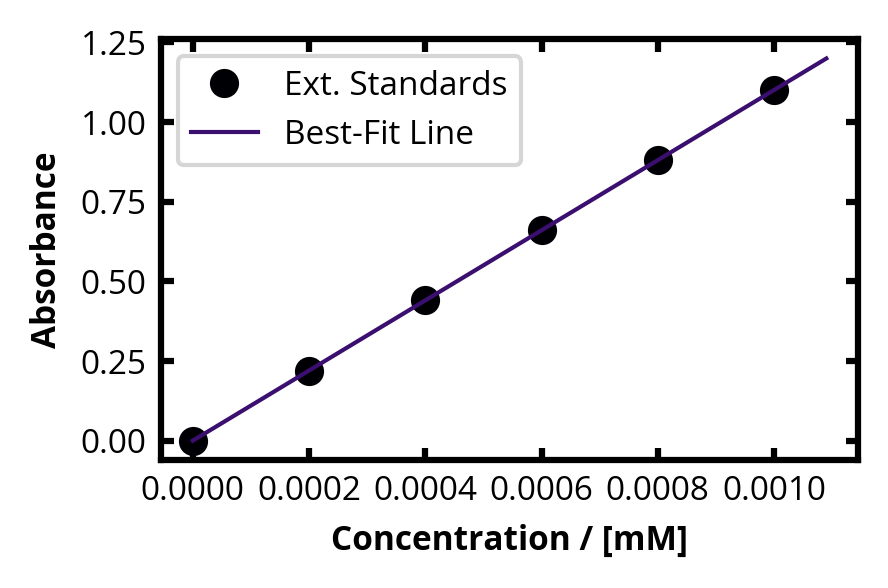

In [55]:
"""
This is a simple example of using external standards to determin a response function.
Standards were prepared that had analyte concentrations ranging from 0.000 to 0.001 M. 
Those standard solutions were then analyzed individually using UV-vis spectrophotometry.
"""

concentration = np.arange(0.0,0.0011,0.0002)
print('Molar concentrations of external standards: ' + str(concentration))
absorbance = np.array([0., 0.22, 0.44, 0.66, 0.88, 1.1])
print('Absorbance measured for the external standards: ' + str(absorbance))

fig, ax = plt.subplots(tight_layout=True) 
ax.plot(concentration,absorbance,c=colors[0],marker='o',ls='',label='Ext. Standards')

coefficients = np.polynomial.polynomial.polyfit(concentration,absorbance,1)
slope = coefficients[1]
intercept = coefficients[0]
print('The slope is: ' + str(slope) + ' M^-1')
print('The intercept is: ' + str(intercept))
x = np.arange(0.0,0.0011,0.00001)
y = np.polynomial.polynomial.polyval(x,coefficients)
ax.plot(x,y,c=colors[1],marker='',ls='-',label='Best-Fit Line')

ax.set_xlabel('Concentration / [mM]')
ax.set_ylabel('Absorbance')
ax.legend(loc='upper left')
plt.show()


**Figure 1.** An example of a calibration plot determined from results for external standards. Here, five external standards of known analyte concentration were analyzed using the same method. The signal was plotted as a function of analyte concentration. Linear regression of these data was used to determine the line-of-best fit, which is the response function for the method.

0.000702727272727273


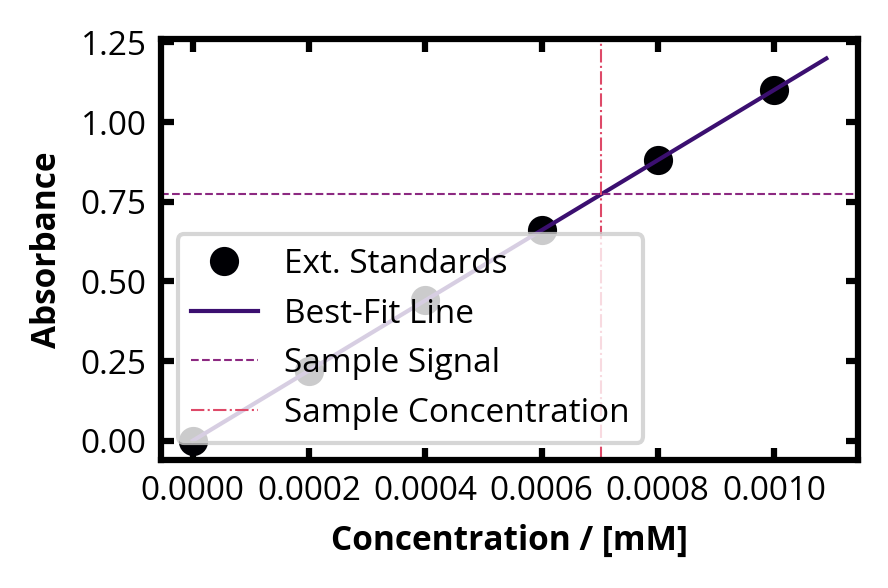

In [57]:
signal_sample = 0.773
concentration_sample = (signal_sample-intercept)/slope
print(concentration_sample)

fig, ax = plt.subplots(tight_layout=True) 
ax.plot(concentration,absorbance,c=colors[0],marker='o',ls='',label='Ext. Standards')
ax.plot(x,y,c=colors[1],marker='',ls='-',label='Best-Fit Line')
ax.axhline(y=signal_sample, c=colors[2],ls='--',lw=0.5,marker=None, label='Sample Signal')
ax.axvline(x=concentration_sample, c=colors[3],ls='-.',lw=0.5,marker=None, label='Sample Concentration')


ax.set_xlabel('Concentration / [mM]')
ax.set_ylabel('Absorbance')
ax.legend(loc='lower left')
plt.show()




**Figure 2.** Determining the concentration of the analyte in a sample, based on a calibration plot. Here, analysis of a sample containing an analyte with an unknown concentration yielded a signal of 0.773. Drawing a horizontal line from the y-axis to the response function and a vertical line to the x-axis indicates that the concentration of the analyte in the sample was 0.00070 M. Alternatively, the analyst could have replaced S in the response function with the experimental value of 0.12 and solved for the concentration of the analyte. 

## Errors in Chemical Measurements
### Systematic Errors
**Systematic errors** create **bias** in a chemical measurement. A bias means that the values determined are consistently higher or consistently lower than the true value. Systematic errors are usually either constant (i.e., the magnitude of the bias is constant and independent of the concentration of the analyte) or  proportional (i.e., the magnitude of the bias is proportional to the concentration of the analyte). Systematic errors are also referred to as deterministic errors.

The slope is: 1100.0000000000002 M^-1
The intercept is: 0.16999999999999976


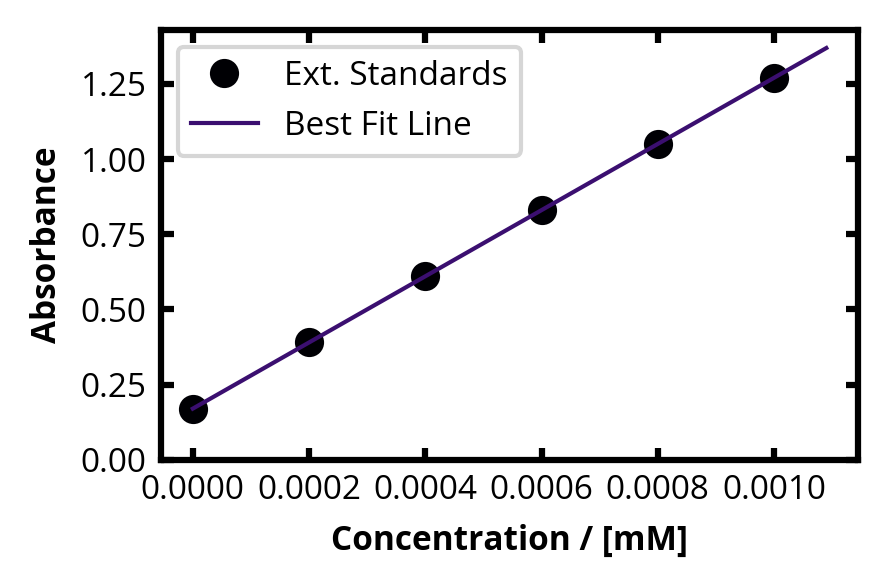

In [65]:
absorbance = np.array([0., 0.22, 0.44, 0.66, 0.88, 1.1])
absorbance += 0.17

fig, ax = plt.subplots(tight_layout=True) 
ax.plot(concentration,absorbance,c=colors[0],marker='o',ls='',label='Ext. Standards')

coefficients = np.polynomial.polynomial.polyfit(concentration,absorbance,1)
slope = coefficients[1]
intercept = coefficients[0]
print('The slope is: ' + str(slope) + ' M^-1')
print('The intercept is: ' + str(intercept))
x = np.arange(0.0,0.0011,0.00001)
y = np.polynomial.polynomial.polyval(x,coefficients)
ax.plot(x,y,c=colors[1],marker='',ls='-',label='Best Fit Line')

ax.set_xlabel('Concentration / [mM]')
ax.set_ylabel('Absorbance')
ax.set_ylim(bottom=0.)
ax.legend(loc='upper left')
plt.show()

**Figure 3.** A constant bias in the method causes the measured signal to be systematically larger than that expected based on the concentration of the standards and the response factor $K$. Adding an additional term $b$ to the response function accounts for that constant bias. Interpreting signals measured using this method with the full response function, $Signal =K[analyte]+b$, will account for this bias. 

### Random Errors
*Random errors* reduce the precision of a chemical measurement. Random errors cause the determined values to vary from the true value, but there is an equal chance for the difference between the determined value and the true value to be positive or negative. Random errors are also referred to as indeterministic errors.

The slope of the high-speed method is: 1063.052333320906 M^-1
The intercept of the high-speed method is: -0.01517985723818088
The uM concentration determined for the sample (A=0.77) using the high-speed method is: 741.4309084633289


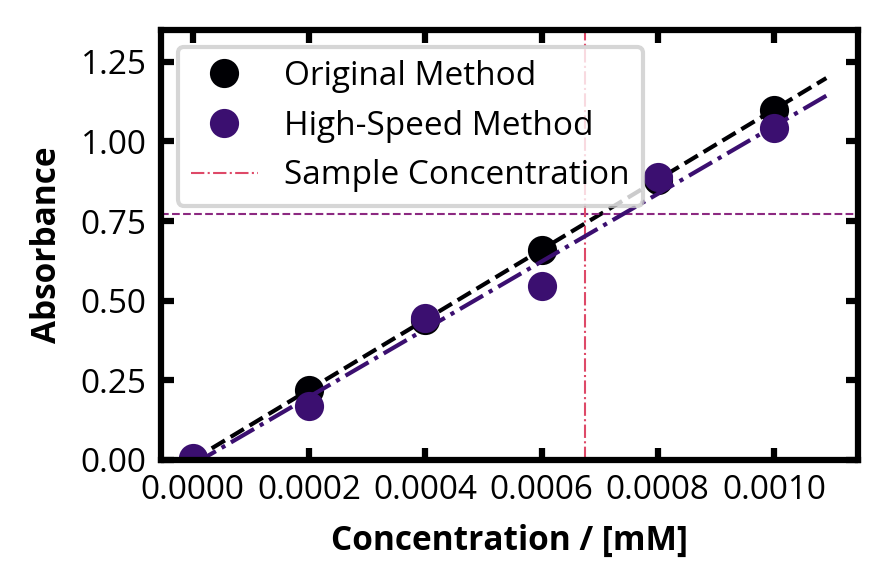

In [256]:
original_method = np.array([0., 0.22, 0.44, 0.66, 0.88, 1.1])
noise = np.random.default_rng().normal(0.0, 0.1, len(original_method))
high_speed_method = original_method + noise

fig, ax = plt.subplots(tight_layout=True) 
ax.plot(concentration,original_method,c=colors[0],marker='o',ls='',label='Original Method')
coefficients = np.polynomial.polynomial.polyfit(concentration,original_method,1)
x = np.arange(0.0,0.0011,0.00001)
y = np.polynomial.polynomial.polyval(x,coefficients)
ax.plot(x,y,c=colors[0],marker='',ls='--')

ax.plot(concentration,high_speed_method,c=colors[1],marker='o',ls='',label='High-Speed Method')
coefficients = np.polynomial.polynomial.polyfit(concentration,high_speed_method,1)
slope = coefficients[1]
intercept = coefficients[0]
print('The slope of the high-speed method is: ' + str(slope) + ' M^-1')
print('The intercept of the high-speed method is: ' + str(intercept))
signal_sample = 0.773
ax.axhline(y=signal_sample, c=colors[2],ls='--',lw=0.5,marker=None)
ax.axvline(x=concentration_sample, c=colors[3],ls='-.',lw=0.5,marker=None, label='Sample Concentration')
concentration_sample = (signal_sample-intercept)/slope
print('The uM concentration determined for the sample (A=0.77) using the high-speed method is: ' + str(concentration_sample*1000000))


y = np.polynomial.polynomial.polyval(x,coefficients)
ax.plot(x,y,c=colors[1],marker='',ls='-.')

ax.set_xlabel('Concentration / [mM]')
ax.set_ylabel('Absorbance')
ax.set_ylim(bottom=0.,top=1.35)
ax.legend(loc='upper left')
plt.show()

**Figure 4.** An alternative method was used to analyze the same external standards. This method is much faster, which enables the analyst to analyze more samples per hous, but has greater random errors. Note that the random error can yield values that are greater than or less than the higher-precision measurements, but linear regression of both sets of calibration data yield similar response functions. Based on a single measurement of a sample with unknown analyte concentration using the high-speed method, the precision of the determined concentration will be less than that determined using the original method (i.e., a wider range of concentration values will be consistent with the measurement).